In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import norm

j = complex(0,1)

# Theory

## 1 Dimensional

Suppose we have a discrete section of a signal sampled $X$ times. You can think of this as an array of values with a size of $X$.

In [2]:
signal = np.array([1, 2, 3, 2, 1, 2, 3, 2, 1])
X = signal.size
X

9

If we use numpy's discrete fft transform function, the frequencies measured will be sampled from $0$ to $X$ with step size $\Delta k=1/X$:

$$\vec{k}=\left[0, 1/X, 2/X, ...,  1\right] $$

In fourier optics, the projection of the relationship between the $k$'s of the fourier transform and <i> the actual displacement on the screen </i> is given by

$$ x = \frac{\lambda f}{2 \pi}k \implies \Delta x = \frac{\lambda f}{2 \pi}\Delta k$$

where $\lambda$ is the wavelength of the light and $f$ is the focal length of the lens. It follows that the spacing on the screen is given by

$$\Delta x =  \frac{\lambda f}{2 \pi X}$$

In other words, the points of the image $\Delta x_{im}$ on the back focal plane are related to the points from the object $\Delta x_{ob}$ on the front focal plane by

$$\Delta x_{im} = \frac{\lambda f}{2 \pi X} \Delta x_{ob}$$

### Implications of the Equation Above

<b> 1: </b> The units that the image is measured in don't matter. They get canceled out on each side of the equation.

<b> 2: </b> If we want to increase the size of the image in the focal plane, we can increase the wavelength $\lambda$ or the focal length $f$ of the lens. 

<b> 3: </b> We can make $\Delta x_{im}$ really small if we take an infinite sample $X \to \infty$. This approaches the limit for the continuous fourier transform.

In [3]:
wave_len = 655*10e-9
foc_len = 200*10e-3
X = 1024

del_k = 1/X

This scale factor will be used to scale the fourier plots.

In [4]:
scale = wave_len*foc_len*del_k/(2*np.pi)

# Define the Aperture

In [5]:
def func(x, y, radius = 100):
    R = np.sqrt(x**2+y**2)
    return np.heaviside(R, 1) - np.heaviside(R-radius, 1)

x0 = -(X/2)
dx = 1
x=np.arange(x0,-x0,dx)
y0 = -(X/2)
dy = 1
y=np.arange(y0,-y0,dy)

# Hole Getting Smaller and Smaller...

In [6]:
X, Y = np.meshgrid(x,y)
nonfour = func(X, Y, radius=50)

g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )

#Normalize to Unit Area
nonfour = nonfour / nonfour.sum()
G = G / G.sum()

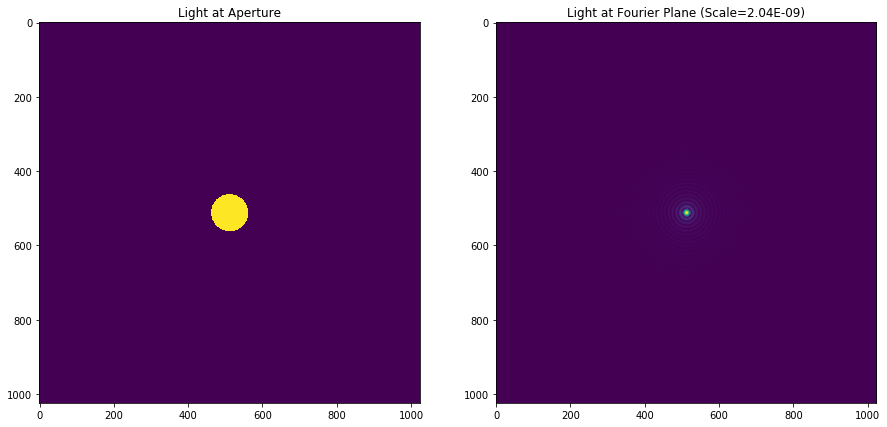

In [7]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].imshow(nonfour)
axes[1].imshow(np.abs(G))

axes[0].set_title('Light at Aperture')
axes[1].set_title('Light at Fourier Plane (Scale={})'.format('%.2E' %scale))
plt.show()

In [8]:
X, Y = np.meshgrid(x,y)
nonfour = func(X, Y, radius=30)

g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )

#Normalize to Unit Area
nonfour = nonfour / nonfour.sum()
G = G / G.sum()

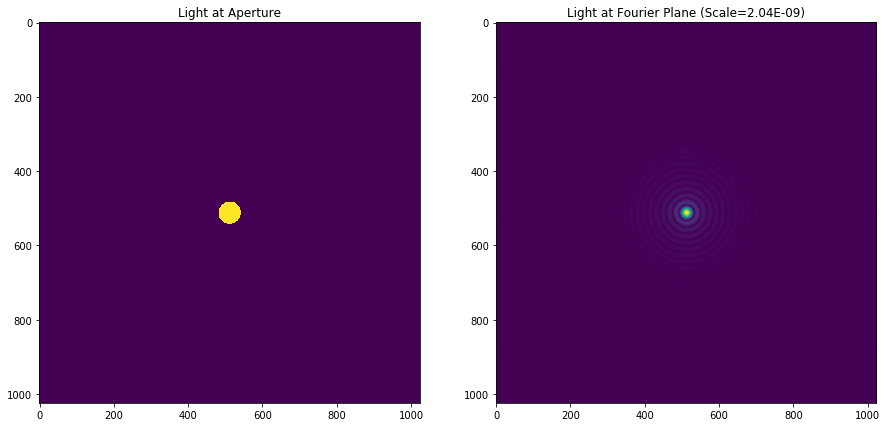

In [9]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].imshow(nonfour)
axes[1].imshow(np.abs(G))

axes[0].set_title('Light at Aperture')
axes[1].set_title('Light at Fourier Plane (Scale={})'.format('%.2E' %scale))
plt.show()

In [10]:
X, Y = np.meshgrid(x,y)
nonfour = func(X, Y, radius = 10)

g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )

#Normalize to Unit Area
nonfour = nonfour / nonfour.sum()
G = G / G.sum()

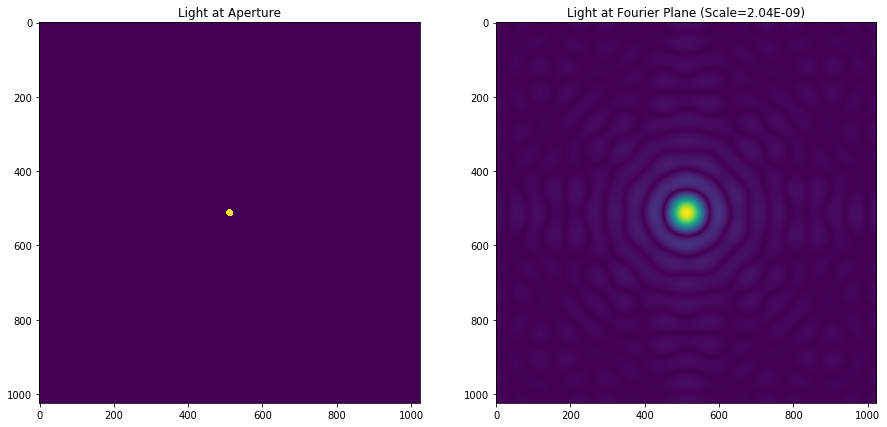

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].imshow(nonfour)
axes[1].imshow(np.abs(G))

axes[0].set_title('Light at Aperture')
axes[1].set_title('Light at Fourier Plane (Scale={})'.format('%.2E' %scale))
plt.show()